##### Objective : 
- To build a basic classifier model using an inbuilt dataset like `iris` or `mtcars`
- Revise the basic classifier to ensemble modelling

##### Inbuilt dataset's
- use the `iris` dataset from the seaborn library or the `mtcars` dataset from the plotnine library. There can be other datasets too.

- Script create date: 14/April/2019
- Script last modified date: 

In [34]:
# Load the required libraries
import warnings
warnings.filterwarnings('ignore')
from plotnine.data import mtcars
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The `ggplot2` of the `R` fame in `Python` is called the `plotnine`
Install it by, `conda install -c conda-forge plotnine`. Look at its documentation [here](https://plotnine.readthedocs.io/en/stable/index.html)

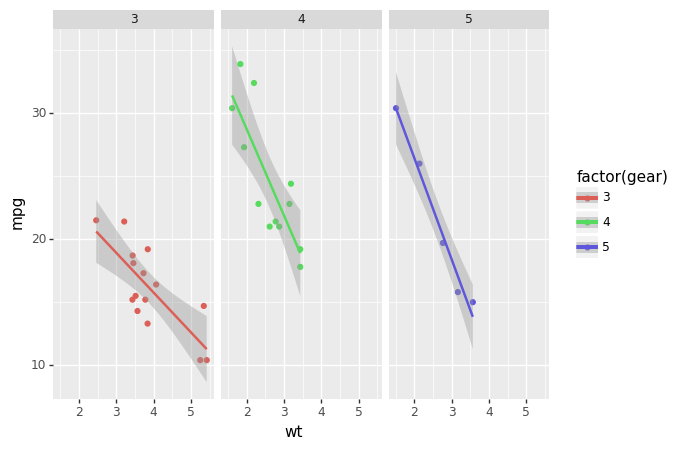

<ggplot: (12954667)>

In [10]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [13]:
# check data dimensions
mtcars.shape

(32, 12)

In [14]:
# check the first 5 rows
mtcars.head(5)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
# check the last 5 rows
mtcars.tail()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [16]:
# look at the data structure
# info() is str() of R
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
name    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [18]:
# describe the data
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


##### Building a Linear Regression model

In [26]:
from sklearn import linear_model
import pandas as pd

In [25]:
# Initialize model
regression_model = linear_model.LinearRegression()

In [27]:
# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.285126167342035
[-5.34447157]


We can get a sense of how much of the variance in the response variable is explained by the model using the `model.score()` function:

In [29]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582647

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [30]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -3.663736e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as `1 - (SSResiduals/SSTotal)`, where `SSResiduals` is the sum of the squares of the model residuals and `SSTotal` is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:

In [31]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582647

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

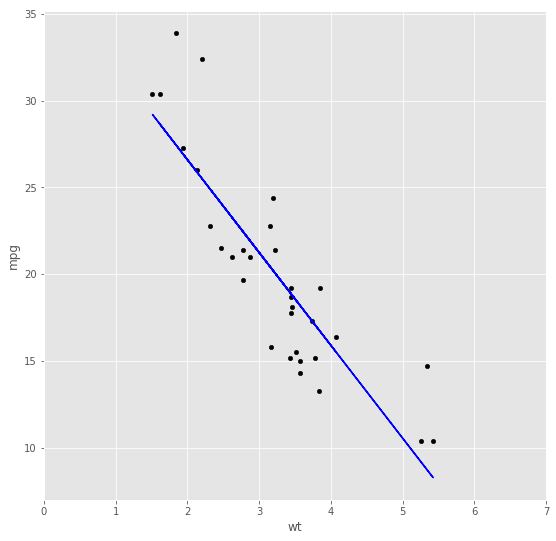

In [35]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458965, -3.411206338320

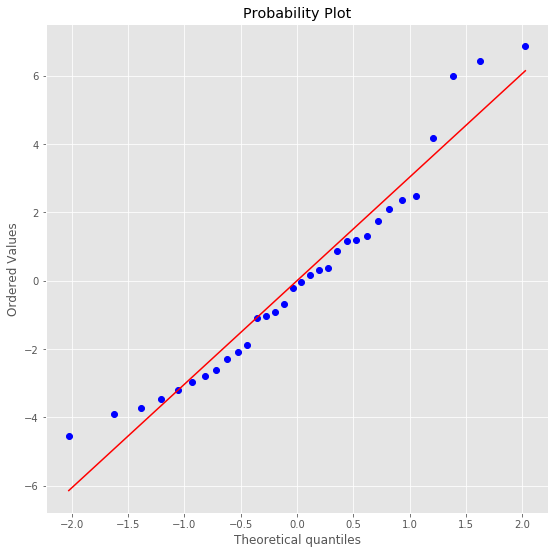

In [37]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

##### Model Evaluation Metric

After making model predictions, it is useful to have some sort of metric to evaluate oh well the model performed. **Adjusted R-squared is one useful measure, but it only applies to the regression model**: we'd like some universal evaluation metric that lets us compare the performance of different types of models. **Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers**. Root mean squared error is square root of the average of the squared error (residuals.).

In [38]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.9491626859550277